#Assignment 7: Simple Linear Regression

##Sagar Matur
GO_STP_6290

In [2]:
# Importing all the required libraries.
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [3]:
# importing the data
df = pd.read_csv("/content/StudentHoursScores_assignment7.csv")  
df.head()    #This prints the first five observations of the dataframe.

,Hours,Scores
0,7.7,79
1,5.9,60
2,4.5,45
3,3.3,33
4,1.1,12


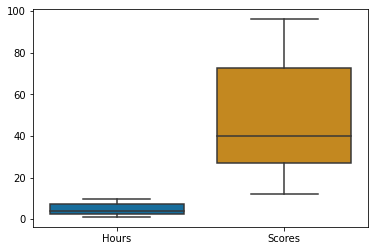

In [4]:
#Box plot to check the outliers in the dataset
import seaborn as sns
sns.boxplot(data=df, palette="colorblind")

Above graph depicts that there are no outliers in the variables.

## Data Preparation

Divide the dataset into "independent variables" (inputs) and "Dependent variable" (outputs). In our study we have one independent variable: "Hours" and one dependent variable: "Scores".

In [5]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

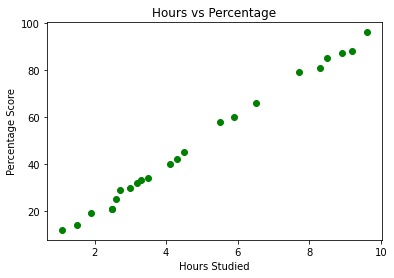

In [6]:
# Plotting the distribution of scores
plt.scatter(X, y, color='green')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

The above graph depicts that there is a linear relationship between "Percentage Score" and "Hours Studied. That is, as the number of study hours increases the scores also increases.

Divide the dataset into two parts: Train set and Test set. 75% of the data is assigned to train set and 25% data is assigned to the test set.

In [7]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.25, random_state=0) 

## Train the Model

In [8]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print(regressor.intercept_)
print(regressor.coef_)

-0.8066783487190321
[10.04977925]


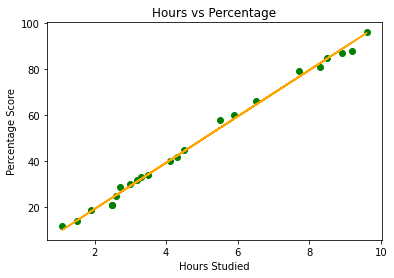

In [9]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y, color='green')
plt.plot(X, line, color='orange');
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

## Test the model
We have trained our model, now it's time to test the model.

In [10]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[9.2]
 [5.5]
 [3. ]
 [8.5]
 [4.1]
 [5.9]]


In [11]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,88,91.651291
1,58,54.467108
2,30,29.342659
3,85,84.616445
4,40,40.397417
5,60,58.487019


### **Model Evaluation**

In [12]:
from sklearn import metrics  
MAE = metrics.mean_absolute_error(y_test, y_pred) 
print('Mean Absolute Error:', MAE)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE_scores = np.sqrt(MSE) # convert from MSE to RMSE
print('Root Mean Squared Error:', RMSE_scores)

Mean Absolute Error: 1.689245985518168
Root Mean Squared Error: 2.1923927195905413
